## RECURRENT NEURAL NETWORK FOR APPLE STOCK PRICES

## Data Preprocessing

In [54]:
# Importing the libraries

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
# Importing the training set

dataset_train = pd.read_csv('Data_Science/Stock Prices/Apple/Apple_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [56]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/11/2013,74.860001,74.971428,73.691429,74.290001,60.658089,68722500
1,04/11/2013,74.442856,75.260002,74.115715,75.250000,61.441933,61156900
2,05/11/2013,74.940002,75.555717,74.714287,75.064285,61.290287,66303300
3,06/11/2013,74.878571,74.980003,74.028572,74.417145,63.335331,55843900
4,07/11/2013,74.225716,74.741432,73.197144,73.212860,62.310387,65655100


We now choose a column to get values that are uniform. We could definitily choose every column, <br>
except 'Date' and 'Volume', that has different information. We choose the 'Open' column, <br>
with the stock prices at the opening of the market.

Using MinMaxScaler, from sklearn.preprocessing, we normalize our values, in the range<br>
contained in the feature_range parameter, meaning among 0 and 1 in this case.

In [57]:
# Feature Scaling

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [58]:
training_set_scaled[:5]

array([[0.02574358],
       [0.02313708],
       [0.02624346],
       [0.02585962],
       [0.02178029]])

Now we create two data structures, one with the 60 previous values, one for the output. <br>
We are going to use these data structures for the training of our <b>RNN</b>.<br>
We call them X_train and y_train.

In [59]:
# Creating a data structure with 60 timesteps and 1 output

X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
#y_train = training_set_scaled[60:, :]
X_train, y_train = np.array(X_train), np.array(y_train)

We now to add a third dimension to X_train.

In [60]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building the RNN

In [61]:
# Importing the Keras libraries and packages

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [62]:
# Initialising the RNN

regressor = Sequential()

In [63]:
# Adding the first LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [64]:
# Adding a second LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [65]:
# Adding a third LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [66]:
# Adding a fourth LSTM layer and some Dropout regularisation

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [67]:
# Adding the output layer

regressor.add(Dense(units = 1))

In [68]:
# Compiling the RNN

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [69]:
# Fitting the RNN to the Training set

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 34s 28ms/step - loss: 0.0348
Epoch 2/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0043
Epoch 3/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0038
Epoch 4/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0038
Epoch 5/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0032
Epoch 6/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0030
Epoch 7/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0033
Epoch 8/100
1198/1198 [==============================] - 27s 22ms/step - loss: 0.0033
Epoch 9/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0027
Epoch 10/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0028
Epoch 11/100
1198/1198 [==============================] - 27s 23ms/step - loss: 0.0026
Epoch 12/100
1198/1198 [============================

We built a <b>LSTM</b> neural network, that is a particular <b>RNN</b>.<br>
RNN means Recurrent Neural Network, an algorythm that is having a great success, thanks to its ability<br>
in processing sequential data. It is used by Apple Siri, for instance.<br>
LSTM means Long Short-Term Memory, and it is a specific RNN model. <br>
We trained an LSTM with four layers and a dropout of 20% to prevent overfitting,<br>
for one hundred epochs on five years of Apple stock prices.

## Making the Predictions and Visualising the Results

In the last part, we test our neural network on the next month of Apple stock prices,<br>
to check if we get results close to the real ones.

In [ ]:
# Getting the real stock price of last month

dataset_test = pd.read_csv('Data_Science/Stock Prices/Apple/Apple_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [71]:
# Getting the predicted stock price of last month

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 81):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

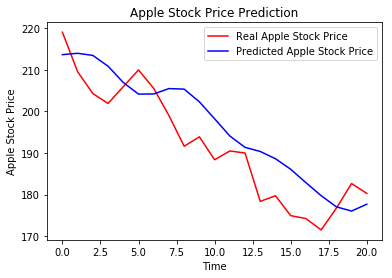

In [72]:
# Visualising the results

plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

This results are great!<br>
Our predictions of Apple stock prices, obtained with a LSTM exceed expectations.<br>
Thanks again to Kirill Eremenko and Hadelin de Ponteves, for their<br>
"Deep Learning A-Z™: Hands-On Artificial Neural Networks" Udemy course.